# World Happiness Report

The World Happiness Report was written by a group of independent experts acting in their personal capacities.  The happiness scores are from Gallup.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv 
import numpy as np

In [2]:
frame = pd.read_csv("world-happiness-report/2015.csv")
frame.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Happiness Score is a metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

The other columns represent the extent to which those factors contribute to the Happiness Score.  <a href="http://worldhappiness.report/faq/">Why are these six factors used to explain life evaluations in this report?</a>
"The variables used reflect what has been broadly found in the research literature to be important in explaining national-level differences in life evaluations."

Let's answer these 2 questions:
1. Highest correlation characteristic(s)
2. Biggest change over years

## 1. What is the factor reported to be most relevent to happiness, on a national scale?

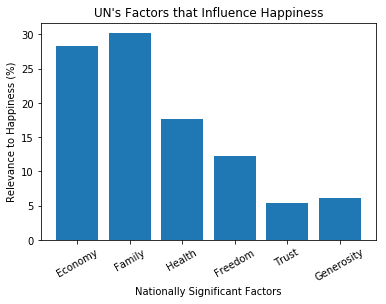

In [3]:
# Create a list of the filenames of the datasets.
dataSets = [
    'world-happiness-report/2015.csv',
    'world-happiness-report/2016.csv',
    'world-happiness-report/2017.csv'
           ]

# The column names in the csv files are inconsistent.
# Create a list of common column names for two datasets.
factorNames2015and2016 = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
                         ]
# Create a list of column names for the third dataset.
factorNames2017 = [
    'Economy..GDP.per.Capita.',
    'Family',
    'Health..Life.Expectancy.',
    'Freedom',
    'Generosity',
    'Trust..Government.Corruption.'
                  ]
# Create a list of the lists of column names.
factorsByYear = [
    factorNames2015and2016,
    factorNames2015and2016,
    factorNames2017
                ]

# Create a list to hold lists of column averages per dataset.
threeAverages = [[], [], []]

# Iterate over the datasets, finding the averages per column.
for i in range(len(dataSets)):
    frame = pd.read_csv(dataSets[i])
    factorsByUN = factorsByYear[i]

    for factor in factorsByUN:
        columnData = list(frame[factor])
        average = sum(columnData) / len(columnData)
        threeAverages[i].append(average)

# Determine the averages of the averages and put them in a list.
averages = []
quantityAves = len(factorNames2015and2016)
for i in range(quantityAves):
    averages.append(
                       (
                           threeAverages[0][i] + 
                           threeAverages[1][i] + 
                           threeAverages[2][i]
                       ) / quantityAves
                   )

# Determine the amount of happiness accounted for by each column.
averagePercents = []
happinessSum = sum(averages)
for i in range(len(averages)):
    # Calculate the national happiness percentage of the column.
    averagePercents.append(averages[i] / happinessSum * 100)

# Abbreviate the names of the factors for readability.
xLabels = []
for factor in factorNames2015and2016:
    xLabels.append(factor.split()[0])

indices = np.arange(len(factorNames2015and2016))
plt.bar(indices, averagePercents)
plt.xticks(indices, xLabels, rotation = 30)
plt.xlabel("Nationally Significant Factors")
plt.ylabel("Relevance to Happiness (%)")
plt.title("UN's Factors that Influence Happiness")
plt.show()


## It can't be that simple to quantify happiness on a national scale.
Here's some suicide data from the World Health Organization.

In [4]:
frame = pd.read_csv("who_suicide_statistics.csv")
frame.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


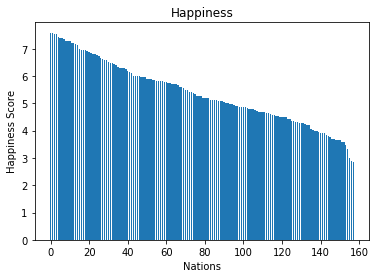

In [5]:
# Each key is a country.
# Each value represents the suicides per capita in that country in 2015.
allCountries = {}
# The current country for which 2015 suicides are being tallied.
country = None
# The running count of suicides for the current country in 2015.
suicides = 0
# The running count of the population, suicide or not.
population = 0

# Read in sad stats.
with open("who_suicide_statistics.csv") as file:
    reader = csv.DictReader(file)

    for row in reader:
        # Ensure there is sufficient data for only 2015.
        if int(row['year']) == 2015 and row['suicides_no'] and row['population']:
            if row['country'] != country:
                if country is not None:
                    # Add the per capita suicides of surveyed groups in country.
                    allCountries[country] = suicides / population
                    suicides = 0
                    population = 0
                country = row['country']
            suicides += int(row['suicides_no'])
            population += int(row['population'])

xVals, yVals1, yVals2 = [], [], []

# Read in happy stats.
with open("world-happiness-report/2015.csv") as file:
    reader = csv.DictReader(file)
    for row in reader:
        country = row['Country']
        xVals.append(country)
        yVals1.append(float(row['Happiness Score']))
        if country in allCountries:
            yVals2.append(allCountries[country])
        else:
            # Just knock the bar down so as not to distract eyes.
            yVals2.append(0)


indices = np.arange(len(xVals))
# bar1 = plt.bar(indices, yVals1)
# bar2 = plt.bar(indices, yVals2)
barBuffer = 0.8
bar1 = plt.bar(indices + 0 * barBuffer, yVals1, width = barBuffer)
# bar2 = plt.bar(indices + 1 * barBuffer, yVals2, width = barBuffer)
# handles = (bar1, bar2)
# labels = ('Happiness', 'Suicides per capita')
# plt.legend(handles, labels)
plt.xlabel("Nations")
plt.ylabel("Happiness Score")
plt.title("Happiness")
plt.show()

Compare happiness graph with sadness graph.

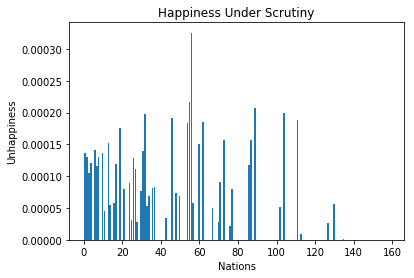

In [6]:
barBuffer = 0.8
bar2 = plt.bar(indices + 1 * barBuffer, yVals2, width = barBuffer)
plt.xlabel("Nations")
plt.ylabel("Unhappiness")
plt.title("Happiness Under Scrutiny")
plt.show()

## 2. Biggest Change of Happiness Over Years

#### Why
By looking at the changes in happiness for each country on both sides of the spectrum, we can get a better sense of how quickly each year the population can change their opinion of how happy they are. Additionally, we can observe some patters and perhaps draw some connections to recent events and how that impacts people's perception of happiness. 

#### What
The following code compares the changes in scores for the highest and lowest performing countries from 2015-16 and 2016-17. Countries in Eastern Europe and Northern Africa generally see an increase in happiness, while select countries from the Caribbean, South America, and Africa see decreases, such as Venezuela which has experienced drastic economic and governmental issues in the last decade. 
##### _Making Sense of the Data_ 
For reference, the highest performing country in 2017 was Norway, with a score of 7.537. As seen in the data, the country with the highest change in happiness from 2016-17 was Bulgaria, with a score change of almost ~0.5 points, making the country climb 24 ranks. 

#### How
 The following script takes in the three csv files, cleans and ensures parity for each country's data from each csv and creates dicts with that data. It then calculates the deltas in score for each country over the 3 years by running a calculation using for loops through the lists generated from dicts. We find the average change in score as a baseline comparison, which is very close to zero in both years. The country deltas and average score is put into lists to graph. 

In [10]:
import matplotlib.pyplot as plt
import csv 
import numpy as np

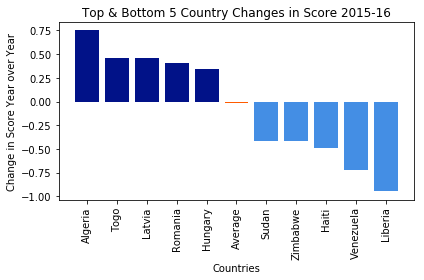

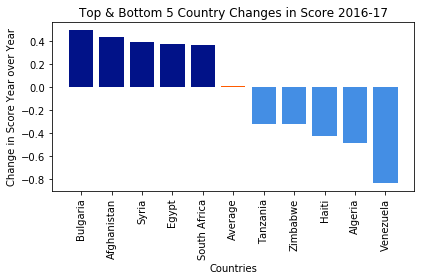

In [11]:
def secondElem(s):
    return s[1]

def barGraph(xVals, yVals, yaxisLabel, xaxisLabel, Title):
    top5 = '#011288'
    avg = '#ff5b00'
    bot5 = '#448ee4'
    colorList = [top5, top5, top5, top5, top5, avg, bot5, bot5, bot5, bot5, bot5]
    ind = range(len(xVals))
    plt.bar(ind, yVals, color=colorList)
    plt.xticks(ind, xVals, rotation=90)
    plt.xlabel(xaxisLabel)
    plt.ylabel(yaxisLabel)
    plt.title(Title)
    plt.tight_layout()
    plt.show()

f15 = open('world-happiness-report/2015.csv', 'r')
f16 = open('world-happiness-report/2016.csv', 'r')
f17 = open('world-happiness-report/2017.csv', 'r')

reader15 = csv.DictReader(f15)
reader16 = csv.DictReader(f16)
reader17 = csv.DictReader(f17)

countries15 = []
countries16 = []
countries17 = []
scores15 = []
scores16 = []
scores17 = []
for row in reader15:
    country = row['Country']
    countries15.append(country)
    score = row['Happiness Score']
    scores15.append(score)
for row in reader16:
    country = row['Country']
    countries16.append(country)
    score = row['Happiness Score']
    scores16.append(score)
for row in reader17:
    country = row['Country']
    countries17.append(country)
    score = row['Happiness.Score']
    scores17.append(score)

countriesAll3 = []
for country in countries15:
    if country in countries16:
        if country in countries17:
            countriesAll3.append(country)

change15to16 = {}
for country in countriesAll3:
    indCountry15 = countries15.index(country)
    score = scores15[indCountry15]
    indCountry16 = countries16.index(country)
    scr = scores16[indCountry16]
    change15to16[country] = float(scr) - float(score)

change16to17 = {}
for country in countriesAll3:
    indCountry16 = countries16.index(country)
    score = scores16[indCountry16]
    indCountry17 = countries17.index(country)
    scr = scores17[indCountry17]
    change16to17[country] = float(scr) - float(score)

list15to16 = []
list16to17 = []
changes1 = []
changes2 = []
for country in change15to16:
    change1 = change15to16[country]
    change2 = change16to17[country]
    changes1.append(change1)
    changes2.append(change2)
    list15to16.append((country, change1))
    list16to17.append((country, change2))

avgChange1 = sum(changes1)/len(changes1)
avgChange2 = sum(changes2)/len(changes2)

sorted15to16 = sorted(list15to16, key=secondElem)
# print(sorted15to16)
bot5_15to16 = sorted15to16[:5]
bot5_15to16.reverse()
sorted15to16.reverse()
top5_15to16 = sorted15to16[:5]

sorted16to17 = sorted(list16to17, key=secondElem)
bot5_16to17 = sorted16to17[:5]
bot5_16to17.reverse()
sorted16to17.reverse()
top5_16to17 = sorted16to17[:5]

xVals1 = []
yVals1 = []
for (country,change) in top5_15to16:
    xVals1.append(country)
    yVals1.append(change)
xVals1.append('Average')
yVals1.append(avgChange1)
for (country,change) in bot5_15to16:
    xVals1.append(country)
    yVals1.append(change)
# print(xVals1)
# print(yVals1)

xVals2 = []
yVals2 = []
for (country,change) in top5_16to17:
    xVals2.append(country)
    yVals2.append(change)
xVals2.append('Average')
yVals2.append(avgChange2)
for (country,change) in bot5_16to17:
    xVals2.append(country)
    yVals2.append(change)
# print(xVals2)
# print(yVals2)

barGraph(xVals1, yVals1,"Change in Score Year over Year", "Countries", "Top & Bottom 5 Country Changes in Score 2015-16" )
barGraph(xVals2, yVals2,"Change in Score Year over Year", "Countries", "Top & Bottom 5 Country Changes in Score 2016-17" )

f15.close()
f16.close()
f17.close()


Here's some compelling unanswered questions about this dataset:
- What are some key factors that drove happines up/down?
- Which factors, if any, cause some nations to violate trends in happiness's relation to the six factors?